# Semana 6 Onboarding LIPAI
Usando uma base de dados sobre células mamárias cancerígenas presente em: "https://www.kaggle.com/datasets/wasiqaliyasir/breast-cancer-dataset"


Primeiro, a importação dos dados

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wasiqaliyasir/breast-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-dataset


O kaggle diz pra abrir o csv deste modo mas NÃO FUNCIONA!!!!!!!

Então desisti e abri do modo mais simples possível (que funcionou)

In [ ]:


# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "wasiqaliyasir/breast-cancer-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

In [5]:
import pandas as pd

df = pd.read_csv("/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Há mensagens de erro no output acima, estão informando que há valores Nan, inf ou não numéricos em colunas numéricas, isto não é muito bom, vamos checar.

## Vamos dar uma olhada na tabela

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

A coluna 32 chamada "Unnamed 32" tem todos os valores NaN e nem nome tem, não enetendi a existência dela, vamos paga-la!

In [7]:
df.drop(columns=["Unnamed: 32"], inplace=True)

In [8]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Bom ! A coluna sem sentido sumiu e as demais não possuem valores faltantes.

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Gráficos para auxiliares na vizualização

Aparentemente o seaborn fará mudanças futuras de como funciona e fica mostrando warnings, como não queremos que isso atrapalhe a visualização vamos suprimi-los

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
import seaborn as sns
import matplotlib as plt

### Mostrar a relação do ráio médio com o diagnóstico.

Aparentemente...
- Ráio menor = benígno
- Ráio maior = malígno

<Axes: xlabel='radius_mean', ylabel='Count'>

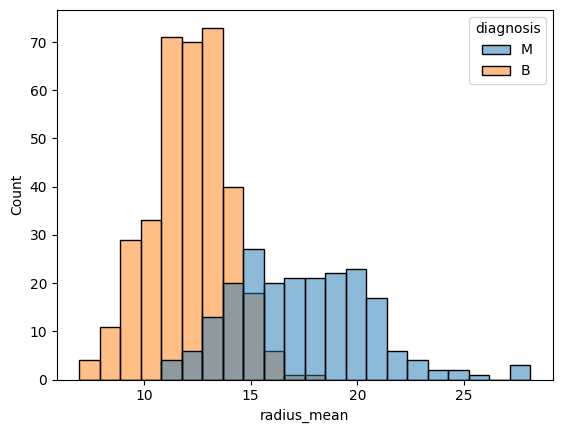

In [12]:
sns.histplot(data=df, x='radius_mean', hue="diagnosis")

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

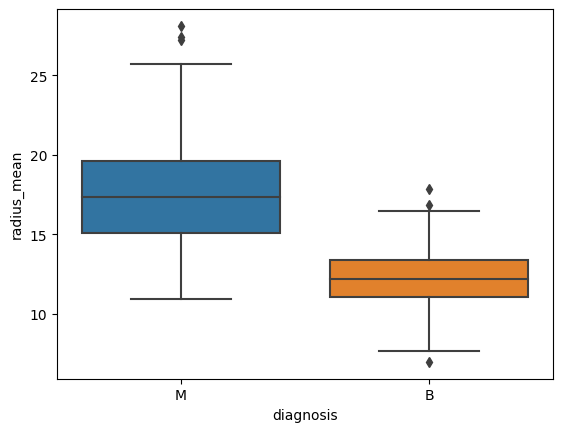

In [13]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df)

### Mostrar se há relação com ráio e textura médios
Aparentemente não, as texturas se parecem, o ue permite a diferenciação maior continua sendo o ráio médio

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

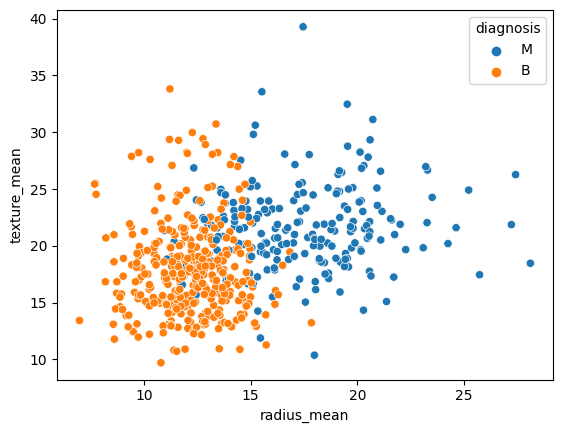

In [14]:
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)

### Comparação entre diversas características duas a duas
plot par a par foi uma nova descoberta que planejo usar a vida interira, muito fácil de fazer e deu uns resultados interessantes:

- perímetro e ráio médios costumasm ser maiores em tumores malignos
- área e ráio médios costumasm ser maiores em tumores malignos


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


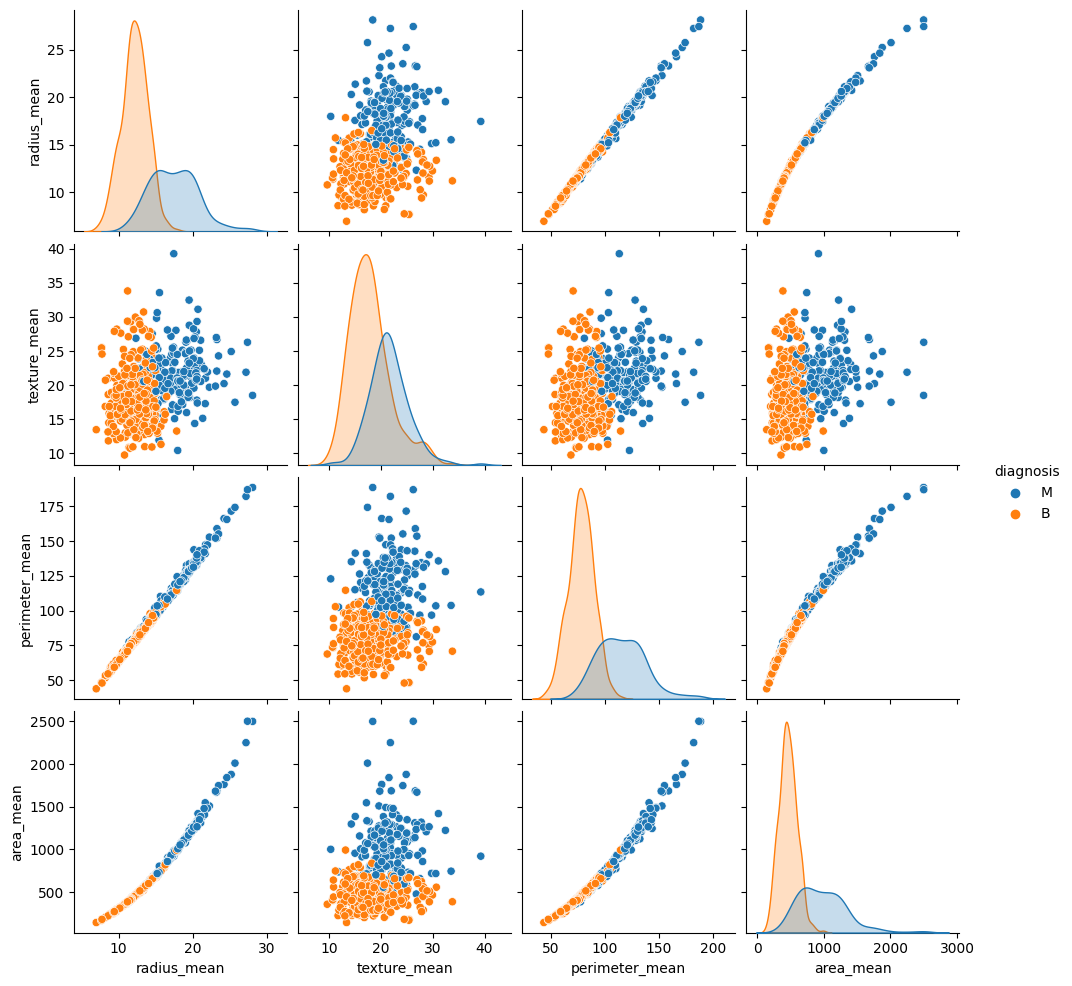

In [15]:
sns.pairplot(df[['radius_mean','texture_mean','perimeter_mean','area_mean','diagnosis']], hue='diagnosis')

Pelos gráficos é notório que há mais valores benígnos do que malignos, em um treinamento haveria enviesamento.

Podemos conferir a discrepância assim:

In [16]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Há 145 amostras benígnas a mais.

## Preparação dos dados
A coluna id também não acrescenta em nada na busca pela identificação do tumor, pode ser podada da tabela

In [17]:
df.drop(columns=["id"], inplace=True)

Não há mais áreas com NaN, todos os dados são numéricos e podem ser usados tranquilamente

Se houvesse NaN em algum bastaria trocar seu valorpela média.

In [25]:
from pandas.api.types import is_numeric_dtype

# trocar NaN por média da coluna
for col in df.columns:
    if is_numeric_dtype(df[col]):
        median = df[col].mean()
        df[col].fillna(median, inplace=True)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Aplicação de diferentes algoritmos
A orientação é: "Faça a modificação do algoritmo de classificação com uma base de dados nova e realize uma comparação de desempenho entre os algoritmos baseados em métricas de avaliação de desempenho."

## Random Forest

Consiste na criação de várias árvores de decisão, a classificação final é dada pelo voto da maioria dessas árvores, bom para reduzir o overfitting  que uma única árvore poderia ter.

Primeiro precisamos separar a classificação final, no frame chamado de 'diagnosis' e as características das células, as demais colunas, vamos chama-las genericamente de features (características)

In [62]:
x = df.drop('diagnosis', axis=1) # class
y = df['diagnosis']              # features

In [27]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

Separar o os dados em treino e teste

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,    # 20% para teste
    random_state=42,  # a separação é randomica, mas com mesma semente é reprodutível o mesmo resultado
    stratify=y        # garante porcentagem parecida de classes desbalanceadas entre treino e teste
)

 Vamos importar o método de treinamento de Random Forest da sklearn



Como foi dito antes há muitos mais exemplos de células cancerígenas benígnas para evitar que o modelo fique tendencioso (afinal se ele cismar de só responder 'benígno' ele irá acertar na mioria das vezes e vai achar q tá bem treinado) há duas opções diretas:

- **Reduzir os exemplos extras de benígnos:** pode ser desvantajoso porque a quantidade de dados é *pouca* aqui, retirar muitos dados pode deixar a classe subrepresentada, jogar fora dados que poderiam ser úteis não é legal.
- **Usar o parametro class_weight='balanced':** própria do método de treinamento da Random Forest da sklearn. Deste modo o treino de classes subrepresentadas recebe mais peso e mantém todos os dados originais do data frame.

Vamos usar o parâmetro como solução.

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

Podemos, agora, treinar o modelo

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Modelo treinado, vamos ver as 10 primeiras predições dele:

In [47]:
y_pred = rf.predict(x_test)
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f"real: {real}, alcançado: {pred}")

real: B, alcançado: B
real: M, alcançado: M
real: B, alcançado: B
real: M, alcançado: M
real: B, alcançado: B
real: B, alcançado: B
real: M, alcançado: M
real: B, alcançado: B
real: B, alcançado: B
real: B, alcançado: B


Vamos para as métricas do modelo

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"acurácia: { accuracy_score(y_test, y_pred):.3f}")
print(f"precisão: { precision_score(y_test, y_pred, pos_label='M'):.3f}")
print(f"recall: { recall_score(y_test, y_pred, pos_label='M'):.3f}")
print(f"f1: { f1_score(y_test, y_pred, pos_label='M'):.3f}")

acurácia: 0.974
precisão: 1.000
recall: 0.929
f1: 0.963


Random Forest deu bons resultados, palmas pra ele 🤲🤲

---

## K-Nearest Neighbors

Nesse algoritmo o modelo não treina com os dados e gera parametros que identifique padrões como o Random Forest ou Redes Neurais, o real processamento aonctece na hora da predição; para cada feature do teste é calculada a distância com as demais células do banco de dados, a seleção de sua classificação é relativa às k células mais próximas dela.

A lógica é que céluals de mesma classe terão características próximas.



Ainda temos x e y como classificação e features das células, isso já está resolvido 👍

O KNN é sensível à escala dos dados, isso não foi preocupação pro RF mas como o que é calculado aqui é a *distancia* entre números, deixa-los dentro de uma mesma escala é vantajoso, então vamos tomar esse cuidado!

O StandartScaler: 
- **Divide todos os valores pela média:** agora ficam cntrados em zero
- **Divide pelo desvio padrão:** agora todos possuem desvio padrão máximo = 1
  
Deste modo, todos os valores ficam bem próximos de 0 com baixa variação


In [65]:
from sklearn.preprocessing import StandardScaler

print("Antes de escalar:")
print(x[0])

scaler = StandardScaler()
x = scaler.fit_transform(x)

print("Após escalar:")
print(x[0])

Antes de escalar:
[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]
Após escalar:
[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


Agora vamos repartir enter *treinamento* e testes com os dados normalizados

In [68]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

Criação do modelo

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # vamos tomar os 5 mas próximos como parâmetro (parece bom número?)
knn.fit(x_train,y_train)

KNeighborsClassifier()

'Treinado' já, vamos testar

In [74]:
y_pred = knn.predict(x_test)

Novamente, vamos ver os medidores de qualidade do modelo

In [80]:
print(f"acurácia: {accuracy_score(y_test, y_pred):.3f}")
print(f"precisão: {precision_score(y_test, y_pred, pos_label='M'):.3f}")
print(f"recall: {recall_score(y_test, y_pred, pos_label='M'):.3f}")
print(f"f1: {f1_score(y_test, y_pred, pos_label='M'):.3f}")


acurácia: 0.956
precisão: 0.974
recall: 0.905
f1: 0.938
